## This code is the study about feature importance of ESALQ experiment

In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from numpy import log
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf
from datetime import datetime, timedelta
from pycaret.regression import *

In [2]:
#função para tratar campo data
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

#Agora vamos importar nosso arquivo 
df = pd.read_excel('biometria.xlsx', sheet_name='Página1')
print(df.tail(10))

     Index    peso  comprimento_Total  comprimento_Padrao  comprimento_Cabeca  \
664  665.0  492.04               29.0                24.8                 8.0   
665  666.0  454.02               27.0                23.0                 7.6   
666  667.0  480.56               27.1                22.8                 7.5   
667  668.0  412.75               25.7                22.0                 7.5   
668  669.0  471.80               27.2                23.4                 7.4   
669  670.0  382.79               25.4                21.5                 7.5   
670  671.0  401.90               26.5                22.3                 7.2   
671  672.0  441.98               27.8                23.4                 7.5   
672  673.0  468.54               28.0                23.5                 7.8   
673  674.0  418.14               26.3                22.2                 7.4   

     altura  espessura       data  
664     9.1        3.2 2024-06-12  
665     9.0        3.2 2024-06-12  


In [3]:
#df.nunique(axis='columns')
df['data'].unique()

array(['2024-02-28T00:00:00.000000000', '2024-03-20T00:00:00.000000000',
       '2024-04-10T00:00:00.000000000', '2024-05-02T00:00:00.000000000',
       '2024-05-23T00:00:00.000000000', '2024-06-12T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [4]:
df1=df[df['data']=='2024-02-28T00:00:00.000000000']
df2=df[df['data']=='2024-03-20T00:00:00.000000000']
df3=df[df['data']=='2024-04-10T00:00:00.000000000']
df4=df[df['data']=='2024-05-02T00:00:00.000000000']
df5=df[df['data']=='2024-05-23T00:00:00.000000000']
df6=df[df['data']=='2024-06-12T00:00:00.000000000']

In [5]:
def drop_columns(df):
    """
    Drops the specified columns from the DataFrame and returns the resulting DataFrame.
    Also prints the first few rows of the resulting DataFrame.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    
    Returns:
    pd.DataFrame: The DataFrame after dropping the specified columns.
    """
    columns_to_drop = ['data', 'Index', 'espessura']
    df = df.drop(columns=columns_to_drop)
    return df

In [6]:
# List of DataFrames
dataframes = [df1, df2, df3, df4, df5, df6]

# Apply drop_columns function to each DataFrame in the list
dropped_dataframes = [drop_columns(df) for df in dataframes]

# Print the first few rows of each resulting DataFrame
for i, df in enumerate(dropped_dataframes):
    print(f"DataFrame {i+1} after dropping columns:")
    print(df.head())

       peso  comprimento_Total  comprimento_Padrao  comprimento_Cabeca  altura
595  290.58               23.4                19.8                 6.2     6.8
596  282.74               23.5                20.3                 6.5     6.5
597  285.64               24.3                20.8                 6.6     6.6
598  290.22               24.3                20.3                 6.8     6.8
599  349.84               25.9                21.5                 7.0     7.0
..      ...                ...                 ...                 ...     ...
669  382.79               25.4                21.5                 7.5     8.5
670  401.90               26.5                22.3                 7.2     8.5
671  441.98               27.8                23.4                 7.5     8.7
672  468.54               28.0                23.5                 7.8     8.5
673  418.14               26.3                22.2                 7.4     8.5

[79 rows x 5 columns]


In [8]:
#### DATA for BLIND TEST
#exp2= setup(data = data,  target = 'peso')

exp1= setup(data = df6,  target = 'peso')
best_model = exp1.compare_models(n_select=1)

,Description,Value
0,Session id,1182
1,Target,peso
2,Target type,Regression
3,Original data shape,"(79, 5)"
4,Transformed data shape,"(79, 5)"
5,Transformed train set shape,"(55, 5)"
6,Transformed test set shape,"(24, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,24.4830,1371.0010,32.8066,0.7004,0.1015,0.0748,0.0080
br,Bayesian Ridge,24.4743,1441.0698,33.1755,0.6892,0.0994,0.0734,0.0080
ridge,Ridge Regression,24.6221,1468.9486,33.4168,0.6825,0.1000,0.0737,0.0060
lasso,Lasso Regression,24.4198,1461.1318,33.3372,0.6823,0.1004,0.0733,0.0060
llar,Lasso Least Angle Regression,24.4196,1461.3693,33.3392,0.6822,0.1004,0.0733,0.0070
lr,Linear Regression,25.1759,1525.8545,34.0232,0.6662,0.1015,0.0751,0.9240
lar,Least Angle Regression,25.1759,1525.8523,34.0232,0.6662,0.1015,0.0751,0.0060
en,Elastic Net,25.9120,1428.4380,34.0641,0.6644,0.1016,0.0777,0.0060
omp,Orthogonal Matching Pursuit,26.4275,1499.7084,35.1107,0.6542,0.1048,0.0783,0.0060
rf,Random Forest Regressor,30.0615,2056.6544,39.2399,0.5797,0.1230,0.0982,0.0380


In [10]:
print(best_model)

HuberRegressor()


In [12]:
huber = exp1.create_model('huber')

ValueError: Estimator HuberRegressor() not available. Please see docstring for list of available estimators.

In [ ]:
# dashboard of pycaret
#evaluate_model(huber)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

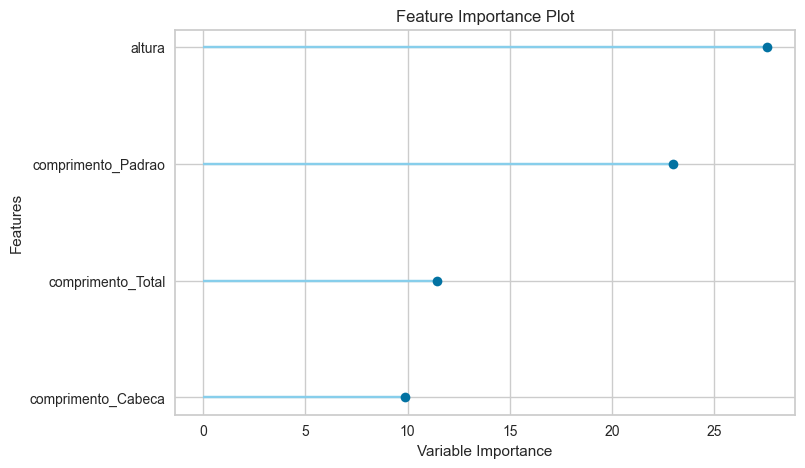

In [ ]:
plot_model(huber, plot = 'feature')

In [ ]:
# dashboard of pycaret
#evaluate_model(rf)

{'lr': 'Logistic Regression', 'knn': 'K Neighbors Classifier', 'nb': 'Naive Bayes', 'dt': 'Decision Tree Classifier', 'svm': 'SVM - Linear Kernel', 'rbfsvm': 'SVM - Radial Kernel', 'gpc': 'Gaussian Process Classifier', 'mlp': 'MLP Classifier', 'ridge': 'Ridge Classifier', 'rf': 'Random Forest Classifier', 'qda': 'Quadratic Discriminant Analysis', 'ada': 'Ada Boost Classifier', 'gbc': 'Gradient Boosting Classifier', 'lda': 'Linear Discriminant Analysis', 'et': 'Extra Trees Classifier', 'xgboost': 'Extreme Gradient Boosting', 'lightgbm': 'Light Gradient Boosting Machine', 'catboost': 'CatBoost Classifier'}


In [ ]:
def automate_modeling(dataframes, target, models_dict):
    results = {}
    for i, df in enumerate(dataframes):
        print(f"Processing DataFrame {i+1}...")
        exp = setup(data=df, target=target, silent=True, verbose=False)
        best_model = compare_models(n_select=1)
        bm_abbreviation = [abbr for name, abbr in models_dict.items() if best_model.__class__.__name__ in name]
        
        if bm_abbreviation:
            bm = create_model(bm_abbreviation[0])
            plot_model(bm, plot='feature')
            results[f'df{i+1}'] = bm
        else:
            print(f"No matching abbreviation found for the best model: {best_model.__class__.__name__}")

    return results

# Example usage
dataframes = [df1, df2, df3, df4, df5, df6]
target_column = 'peso'
models_dict = {
    'Linear Regression': 'lr',
    'Lasso Regression': 'lasso',
    'Ridge Regression': 'ridge',
    'Elastic Net': 'en',
    'Least Angle Regression': 'lar',
    'Lasso Least Angle Regression': 'llar',
    'Orthogonal Matching Pursuit': 'omp',
    'Bayesian Ridge': 'br',
    'Automatic Relevance Determination': 'ard',
    'Passive Aggressive Regressor': 'par',
    'Random Sample Consensus': 'ransac',
    'TheilSen Regressor': 'tr',
    'Huber Regressor': 'huber',
    'Kernel Ridge': 'kr',
    'Support Vector Machine': 'svm',
    'K Neighbors Regressor': 'knn',
    'Decision Tree': 'dt',
    'Random Forest': 'rf',
    'Extra Trees Regressor': 'et',
    'AdaBoost Regressor': 'ada',
    'Gradient Boosting': 'gbr',
    'Multi Level Perceptron': 'mlp',
    'Extreme Gradient Boosting': 'xgboost',
    'Light Gradient Boosting': 'lightgbm',
    'CatBoost Regressor': 'catboost'
}

# Call the function
results = automate_modeling(dataframes, target_column, models_dict)